In [15]:
#@title 1. Montar drive (If you are in in colab){ display-mode: "form" }

import os
from google.colab import drive
path =  "/content/drive/My Drive/Colab Notebooks/Python/Proyectos/20201-ai2-class-project"#@param {type:"string"}
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/Python/Proyectos/20201-ai2-class-project


In [ ]:
#@title 1. Montar drive Elkin (If you are in in colab){ display-mode: "form" }

import os
from google.colab import drive
path =  "/content/drive/My Drive/Proyecto-Artificial-2/20201-ai2-class-project"#@param {type:"string"}
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/Proyecto-Artificial-2/20201-ai2-class-project


In [27]:
#@title 2. Load libraries { display-mode: "form" }
import numpy as np
import pandas as pd 
import sys
import matplotlib.pyplot as plt
from sklearn import datasets
import json
import os
import tensorflow as tf
from tqdm import tqdm
import seaborn as sb
import seaborn as sns
from nltk.corpus import stopwords
import string
from sklearn.preprocessing import LabelEncoder
import nltk
nltk.download('stopwords')
from keras.utils import np_utils

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def text_process(mess):
    """
    Tomamos una cadena de texto y le realizamos lo siguiente
    1. Remueve toda la puntuacion
    2. Remover todas las palabras vacias
    3. Retorna una lista con el texto "limpio"
    """
    # Verificamos los caracteres para ver si poseen algun tipo de en puntuación
    nopunc = [char for char in mess if char not in string.punctuation]

    # Vuelve a unir los caracteres para formar la cadena.
    nopunc = ''.join(nopunc)
    
    # Ahora se eliminan las palabras vacías
    word_seq=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return word_seq

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 3. Descargar datos 1

In [ ]:
try:
    os.mkdir('data')
except OSError:
    print ("Creation of the directory %s failed")
else:
    print ("Successfully created the directory %s ")
os.chdir('data')
print(os.getcwd())

Successfully created the directory %s 
/content/drive/My Drive/Colab Notebooks/Python/Proyectos/20201-ai2-class-project/data


In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "jamf05" # username from the json file
os.environ['KAGGLE_KEY'] = "33b44029575614b1c82d40d85690cbac" # key from the json file
!kaggle datasets download -d praveengovi/emotions-dataset-for-nlp

  0% 0.00/721k [00:00<?, ?B/s]
100% 721k/721k [00:00<00:00, 46.2MB/s]


>**Nota:** Omitir la descarga si ya tiene el archivo **emotions-dataset-for-nlp.zip**

In [ ]:
!unzip 'emotions-dataset-for-nlp.zip'

Archive:  emotions-dataset-for-nlp.zip
  inflating: test.txt                
  inflating: train.txt               
  inflating: val.txt                 


In [ ]:
os.chdir(path)
print(os.getcwd())

/content/drive/My Drive/Colab Notebooks/Python/Proyectos/20201-ai2-class-project


## 4. Tratamiento de datos 1

Procedemos a cargar el dataset y a concatenar para armar el compendio de frases y su respectivo sentimiento. Hay que tener en cuenta que tenemos que analizar y categorizar numericamente los datos de `label`, ademas de secuenciar numericamente (`tokenizar`) mis frases.

In [29]:
df_train = pd.read_csv("data/train.txt", delimiter=';', header=None, names=['sentence','label'])
df_val = pd.read_csv("data/val.txt", delimiter=';',header=None, names=['sentence','label'])
df_test = pd.read_csv("data/test.txt", delimiter=';',header=None, names=['sentence','label'])

df_train.shape,df_val.shape,df_test.shape

((16000, 2), (2000, 2), (2000, 2))

In [30]:
#Concatenacion de un gran dataset
df = pd.concat([df_train,df_test,df_val])
df.shape

(20000, 2)

In [ ]:
df_train.head()

,sentence,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


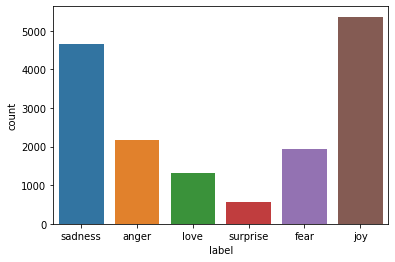

In [ ]:
sns.countplot(df_train['label'])

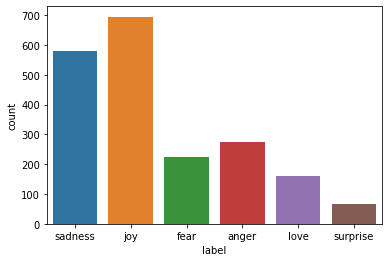

In [ ]:
sns.countplot(df_test['label'])

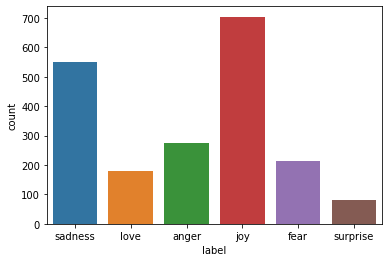

In [ ]:
sns.countplot(df_val['label'])

In [26]:
def text_process(mess):
    """
    Tomamos una cadena de texto y le realizamos lo siguiente
    1. Remueve toda la puntuacion
    2. Remover todas las palabras vacias
    3. Retorna una lista con el texto "limpio"
    """
    # Verificamos los caracteres para ver si poseen algun tipo de en puntuación
    nopunc = [char for char in mess if char not in string.punctuation]

    # Vuelve a unir los caracteres para formar la cadena.
    nopunc = ''.join(nopunc)
    
    # Ahora se eliminan las palabras vacías
    word_seq=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return word_seq

In [ ]:
#Aplicamos la funcion de procesamiento al texto a los datos completos y a la division de datos
text = df['sentence'].apply(text_process)
text_train = df_train['sentence'].apply(text_process)
text_val = df_val['sentence'].apply(text_process)
text_test = df_test['sentence'].apply(text_process)

In [ ]:
text_train

0                                [didnt, feel, humiliated]
1        [go, feeling, hopeless, damned, hopeful, aroun...
2        [im, grabbing, minute, post, feel, greedy, wrong]
3        [ever, feeling, nostalgic, fireplace, know, st...
4                                       [feeling, grouchy]
                               ...                        
15995    [brief, time, beanbag, said, anna, feel, like,...
15996    [turning, feel, pathetic, still, waiting, tabl...
15997                        [feel, strong, good, overall]
15998                [feel, like, rude, comment, im, glad]
15999                   [know, lot, feel, stupid, portray]
Name: sentence, Length: 16000, dtype: object

In [ ]:
max_len = 100
max_words = 20000
#Tokenizamos las palabras, creando un objeto Tokenizer
tokenizer = Tokenizer(num_words=max_words)

tokenizer.fit_on_texts(text)
#Genera la sequencias numericas para los conjuntos de datos
sequences_train = tokenizer.texts_to_sequences(text_train)
sequences_val = tokenizer.texts_to_sequences(text_val)
sequences_test = tokenizer.texts_to_sequences(text_test)

In [ ]:
#Agregacion del padding a la secuencia
data_train = pad_sequences(sequences_train,maxlen=max_len)
data_val = pad_sequences(sequences_val,maxlen=max_len)
data_test = pad_sequences(sequences_test,maxlen=max_len)

In [ ]:
encode=LabelEncoder()

In [ ]:
#Comprobacion de los valores de los labels
print(y_train[0:10],df_train.label.values[0:10])
print(y_val[0:10], df_val.label.values[0:10])
print(y_test[0:10], df_test.label.values[0:10])

[4 4 0 3 0 4 5 1 2 3] ['sadness' 'sadness' 'anger' 'love' 'anger' 'sadness' 'surprise' 'fear'
 'joy' 'love']
[4 4 3 0 2 2 2 2 2 4] ['sadness' 'sadness' 'love' 'anger' 'joy' 'joy' 'joy' 'joy' 'joy'
 'sadness']
[4 4 4 2 4 1 0 2 2 0] ['sadness' 'sadness' 'sadness' 'joy' 'sadness' 'fear' 'anger' 'joy' 'joy'
 'anger']


In [ ]:
#Procedemos a codificar mi salida en one hot encoding y a trabajar con mis categorias de datos
y_train = encode.fit_transform(df_train['label'])
y_data_train = tf.keras.utils.to_categorical(y_train)
print(y_data_train.shape)

y_val = encode.fit_transform(df_val['label'])
y_data_val = tf.keras.utils.to_categorical(y_val)
print(y_data_val.shape)

y_test = encode.fit_transform(df_test['label'])
y_data_test = tf.keras.utils.to_categorical(y_test)
print(y_data_test.shape)

(16000, 6)
(2000, 6)
(2000, 6)


In [ ]:
x_train = data_train
y_train = y_data_train
print("Entrenamiento: ",x_train.shape,y_train.shape)

x_val = data_val
y_val = y_data_val
print("Validacion: ",x_val.shape,y_val.shape)

x_test = data_test
y_test = y_data_test
print("Test: ",x_test.shape,y_test.shape)

Entrenamiento:  (16000, 100) (16000, 6)
Validacion:  (2000, 100) (2000, 6)
Test:  (2000, 100) (2000, 6)


In [ ]:
#Representacion del onehot encoding
y_train

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
#Almacenamiento de los datos nunpy
np.save('data/x_train.npy', x_train)
np.save('data/y_train.npy', y_train)
np.save('data/x_val.npy', x_val)
np.save('data/y_val.npy', y_val)
np.save('data/x_test.npy', x_test)
np.save('data/y_test.npy', y_test)

## 5. Descargar datos 2

In [21]:
# Training set
!wget -O data/anger-ratings-0to1.train.txt http://saifmohammad.com/WebDocs/EmoInt%20Train%20Data/anger-ratings-0to1.train.txt
!wget -O data/fear-ratings-0to1.train.txt http://saifmohammad.com/WebDocs/EmoInt%20Train%20Data/fear-ratings-0to1.train.txt
!wget -O data/joy-ratings-0to1.train.txt http://saifmohammad.com/WebDocs/EmoInt%20Train%20Data/joy-ratings-0to1.train.txt
!wget -O data/sadness-ratings-0to1.train.txt http://saifmohammad.com/WebDocs/EmoInt%20Train%20Data/sadness-ratings-0to1.train.txt

--2020-08-17 02:20:38--  http://saifmohammad.com/WebDocs/EmoInt%20Train%20Data/anger-ratings-0to1.train.txt
Resolving saifmohammad.com (saifmohammad.com)... 192.185.17.122
Connecting to saifmohammad.com (saifmohammad.com)|192.185.17.122|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 95686 (93K) [text/plain]
Saving to: ‘data/anger-ratings-0to1.train.txt’

data/anger-ratings- 100%[===================>]  93.44K  --.-KB/s    in 0.1s    

2020-08-17 02:20:39 (870 KB/s) - ‘data/anger-ratings-0to1.train.txt’ saved [95686/95686]

--2020-08-17 02:20:40--  http://saifmohammad.com/WebDocs/EmoInt%20Train%20Data/fear-ratings-0to1.train.txt
Resolving saifmohammad.com (saifmohammad.com)... 192.185.17.122
Connecting to saifmohammad.com (saifmohammad.com)|192.185.17.122|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133186 (130K) [text/plain]
Saving to: ‘data/fear-ratings-0to1.train.txt’

data/fear-ratings-0 100%[===================>] 130.06K   749KB/

In [20]:
# Development set
!wget -O data/anger-ratings-0to1.dev.gold.txt http://saifmohammad.com/WebDocs/EmoInt%20Dev%20Data%20With%20Gold/anger-ratings-0to1.dev.gold.txt
!wget -O data/fear-ratings-0to1.dev.gold.txt http://saifmohammad.com/WebDocs/EmoInt%20Dev%20Data%20With%20Gold/fear-ratings-0to1.dev.gold.txt
!wget -O data/joy-ratings-0to1.dev.gold.txt http://saifmohammad.com/WebDocs/EmoInt%20Dev%20Data%20With%20Gold/joy-ratings-0to1.dev.gold.txt
!wget -O data/sadness-ratings-0to1.dev.gold.txt http://saifmohammad.com/WebDocs/EmoInt%20Dev%20Data%20With%20Gold/sadness-ratings-0to1.dev.gold.txt

--2020-08-17 02:20:27--  http://saifmohammad.com/WebDocs/EmoInt%20Dev%20Data%20With%20Gold/anger-ratings-0to1.dev.gold.txt
Resolving saifmohammad.com (saifmohammad.com)... 192.185.17.122
Connecting to saifmohammad.com (saifmohammad.com)|192.185.17.122|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9687 (9.5K) [text/plain]
Saving to: ‘data/anger-ratings-0to1.dev.gold.txt’

data/anger-ratings- 100%[===================>]   9.46K  --.-KB/s    in 0.002s  

2020-08-17 02:20:27 (3.99 MB/s) - ‘data/anger-ratings-0to1.dev.gold.txt’ saved [9687/9687]

--2020-08-17 02:20:28--  http://saifmohammad.com/WebDocs/EmoInt%20Dev%20Data%20With%20Gold/fear-ratings-0to1.dev.gold.txt
Resolving saifmohammad.com (saifmohammad.com)... 192.185.17.122
Connecting to saifmohammad.com (saifmohammad.com)|192.185.17.122|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12903 (13K) [text/plain]
Saving to: ‘data/fear-ratings-0to1.dev.gold.txt’

data/fear-ratings-0 100%[==

## 6. Tratamiento de datos 2

In [34]:
df_anger_train = pd.read_csv("data/anger-ratings-0to1.train.txt", delimiter='	', header=None, names=['index','sentence','label','intensity'])
df_fear_train = pd.read_csv("data/fear-ratings-0to1.train.txt", delimiter='	', header=None, names=['index','sentence','label','intensity'])
df_joy_train = pd.read_csv("data/joy-ratings-0to1.train.txt", delimiter='	', header=None, names=['index','sentence','label','intensity'])
df_sadness_train = pd.read_csv("data/sadness-ratings-0to1.train.txt", delimiter='	', header=None, names=['index','sentence','label','intensity'])

df_train = pd.concat([df_anger_train,df_fear_train,df_joy_train,df_sadness_train])
df_train  =  df_train.drop(['index', 'intensity'], axis=1) 
df_train = df_train.sample(frac=1).reset_index(drop=True)
df_train

,sentence,label
0,I don't want perfect. It's too boring and dull.,sadness
1,@HuffPostUK NO greater wrath than a woman sco...,anger
2,Misery loves company. The church ought to be a...,joy
3,Sometimes The Worst Place You Can Be Is In You...,sadness
4,Everything you’ve ever wanted is on the other ...,fear
...,...,...
3608,I had a panic attack when I couldn't find @kat...,fear
3609,"You don't smile and you say you're in love, bu...",joy
3610,@darwinwatersons @pennyfitzger31 @gumballwatte...,fear
3611,I saved him after ordering him to risk his lif...,fear


In [36]:
df_anger_test = pd.read_csv("data/anger-ratings-0to1.dev.gold.txt", delimiter='	', header=None, names=['index','sentence','label','intensity'])
df_fear_test = pd.read_csv("data/fear-ratings-0to1.dev.gold.txt", delimiter='	', header=None, names=['index','sentence','label','intensity'])
df_joy_test = pd.read_csv("data/joy-ratings-0to1.dev.gold.txt", delimiter='	', header=None, names=['index','sentence','label','intensity'])
df_sadness_test = pd.read_csv("data/sadness-ratings-0to1.dev.gold.txt", delimiter='	', header=None, names=['index','sentence','label','intensity'])

df_test = pd.concat([df_anger_test,df_fear_test,df_joy_test,df_sadness_test])
df_test  =  df_test.drop(['index', 'intensity'], axis=1) 
df_test = df_test.sample(frac=1).reset_index(drop=True)
df_test

,sentence,label
0,Southend players always haunt Man U,fear
1,@huwellwell One chosen by the CLP members! MP ...,anger
2,@CozanGaming that's what lisa asked before she...,anger
3,@isthataspider @dhodgs i will fight this guy! ...,anger
4,You're so thirsty for the chance to disagree w...,anger
...,...,...
342,Nothing worse than an uber driver that can't d...,fear
343,I can't WAIT to go to work tomorrow with a hig...,sadness
344,@marcavis @AntisocialJW2 I've always been fier...,anger
345,Dolores.' A thin lipped smile graced glossed l...,joy


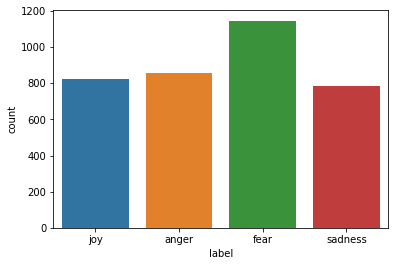

In [24]:
sns.countplot(df_train['label'])

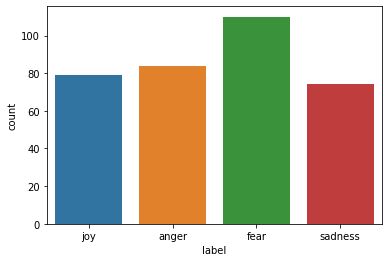

In [25]:
sns.countplot(df_test['label'])

In [37]:
#Aplicamos la funcion de procesamiento al texto a los datos completos y a la division de datos
text = df['sentence'].apply(text_process)
text_train = df_train['sentence'].apply(text_process)
text_val = df_val['sentence'].apply(text_process)
text_test = df_test['sentence'].apply(text_process)

In [38]:
text_train

0                     [dont, want, perfect, boring, dull]
1            [HuffPostUK, greater, wrath, woman, scorned]
2       [Misery, loves, company, church, ought, place,...
3       [Sometimes, Worst, Place, Headnnquotes, worste...
4       [Everything, you’ve, ever, wanted, side, fear,...
                              ...                        
3608    [panic, attack, couldnt, find, katrinalaw, Twi...
3609    [dont, smile, say, youre, love, thats, dont, l...
3610    [darwinwatersons, pennyfitzger31, gumballwatte...
3611    [saved, ordering, risk, life, didnt, panic, st...
3612        [Riggs, dumb, ass, hell, lolol, LethalWeapon]
Name: sentence, Length: 3613, dtype: object

In [40]:
max_len = 100
max_words = 20000
#Tokenizamos las palabras, creando un objeto Tokenizer
tokenizer = Tokenizer(num_words=max_words)

tokenizer.fit_on_texts(text)
#Genera la sequencias numericas para los conjuntos de datos
sequences_train = tokenizer.texts_to_sequences(text_train)
sequences_val = tokenizer.texts_to_sequences(text_val)
sequences_test = tokenizer.texts_to_sequences(text_test)

In [41]:
#Agregacion del padding a la secuencia
data_train = pad_sequences(sequences_train,maxlen=max_len)
data_val = pad_sequences(sequences_val,maxlen=max_len)
data_test = pad_sequences(sequences_test,maxlen=max_len)

In [42]:
encode=LabelEncoder()

In [46]:
#Procedemos a codificar mi salida en one hot encoding y a trabajar con mis categorias de datos
y_train = encode.fit_transform(df_train['label'])
y_data_train = tf.keras.utils.to_categorical(y_train)
print(y_data_train.shape)

y_test = encode.fit_transform(df_test['label'])
y_data_test = tf.keras.utils.to_categorical(y_test)
print(y_data_test.shape)

(3613, 4)
(347, 4)


In [47]:
x_train = data_train
y_train = y_data_train
print("Entrenamiento: ",x_train.shape,y_train.shape)

x_test = data_test
y_test = y_data_test
print("Test: ",x_test.shape,y_test.shape)

Entrenamiento:  (3613, 100) (3613, 4)
Test:  (347, 100) (347, 4)


In [ ]:
#Representacion del onehot encoding
y_train

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
#Almacenamiento de los datos nunpy
np.save('data/x_4_emotion_train.npy', x_train)
np.save('data/y_4_emotion_train.npy', y_train)
np.save('data/x_4_emotion_val.npy', x_val)
np.save('data/y_4_emotion_val.npy', y_val)
np.save('data/x_4_emotion_test.npy', x_test)
np.save('data/y_4_emotion_test.npy', y_test)

## 7. Referencias

- Sentiment analysis [[++](https://www.kaggle.com/adithyansukumar/sentiment-analysis)]
- Classify Emotions in text with BERT [[++](https://www.kaggle.com/praveengovi/classify-emotions-in-text-with-bert)]
- 
NLP-News [[++](https://www.kaggle.com/dionesiusap/nlp-news)]
- Where can I get an Emotion Dataset which contains phrases and their associated emotions ? [[++](https://www.researchgate.net/post/Where_can_I_get_an_Emotion_Dataset_which_contains_phrases_and_their_associated_emotions)]
- WASSA-2017 Shared Task on Emotion Intensity (EmoInt) [[++](http://saifmohammad.com/WebPages/EmotionIntensity-SharedTask.html)]